In [1]:
# import the library we're using for visualization and analysis
library(ggplot2)
library(biosignalEMG)

Warning message:
"package 'biosignalEMG' was built under R version 3.6.3"

In [2]:
# import data, specify dataset location, no headers
data = read.csv('C:/Users/Raymond/test_001_001_Odau_1.csv',
                skip=5,header=FALSE)
# assign strings in vector to column names
colnames(data) <- c('Frame','Analog_1','Analog_2','Analog_3','Analog_4','Analog_5','Analog_6','Analog_7','Analog_8')
# remove NA column
data <- subset(data, select = -c(0, 10))
# show first 6 rows of data
head(data)

Frame,Analog_1,Analog_2,Analog_3,Analog_4,Analog_5,Analog_6,Analog_7,Analog_8
1,0.000610350,0.000305175,-0.004577625,0.002746575,-0.003356925,0.001220700,-0.000305175,0.002441400
2,0.001831050,-0.000305175,-0.004577625,0.003967275,-0.006408675,0.002136225,-0.003051750,0.003356925
3,0.000610350,-0.001220700,0.000610350,0.003662100,-0.006713850,0.002136225,-0.003051750,0.003356925
4,0.000305175,-0.000305175,-0.000305175,0.003662100,-0.005493150,0.000610350,-0.007324200,0.000305175
5,-0.000915525,-0.004272450,0.000610350,0.000915525,-0.001831050,0.000915525,-0.003356925,0.001525875
6,-0.000915525,-0.010986300,-0.000915525,-0.003662100,-0.002136225,-0.003662100,-0.006713850,0.000305175


In [3]:
# assign data in column 1 to variable x
x <- data$Analog_1

In [4]:
# turn x into an EMG object
emg1 <- emg(x)

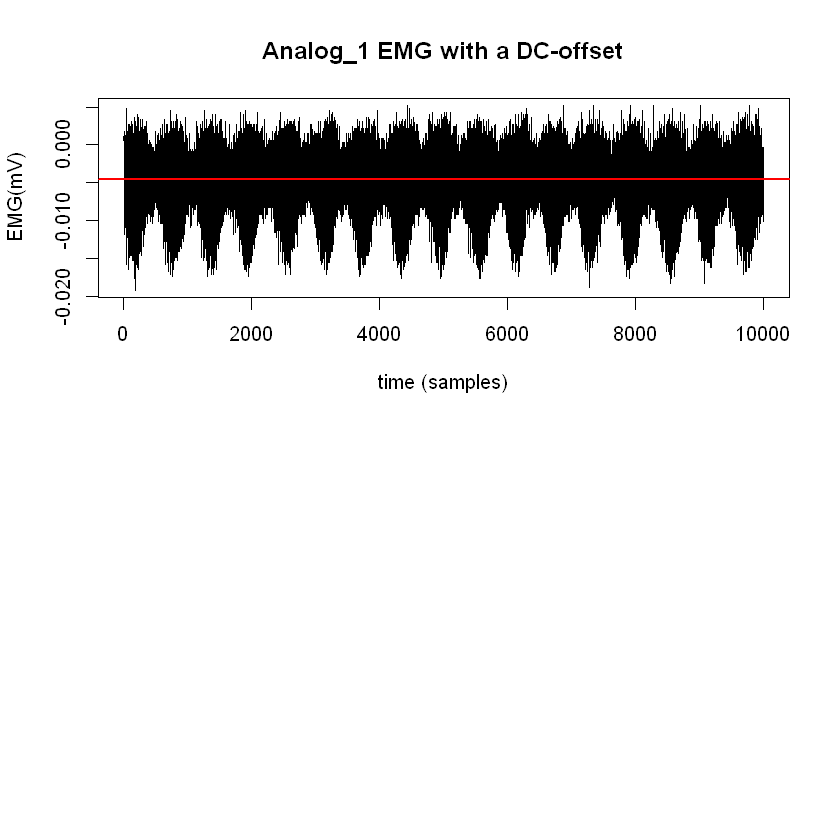

In [5]:
# makes it so you can display >! graph
op <- par(mfrow = c(2, 1))
# analysis - EMG data in dataframe, sampling rate, units
emg1 <- emg(x, samplingrate = 1000, units = "mV", data.name="")
# plot
plot(emg1, main="Analog_1 EMG with a DC-offset")
# show line of mean
abline (h = mean(emg1$values), col = "red", lwd = 2)

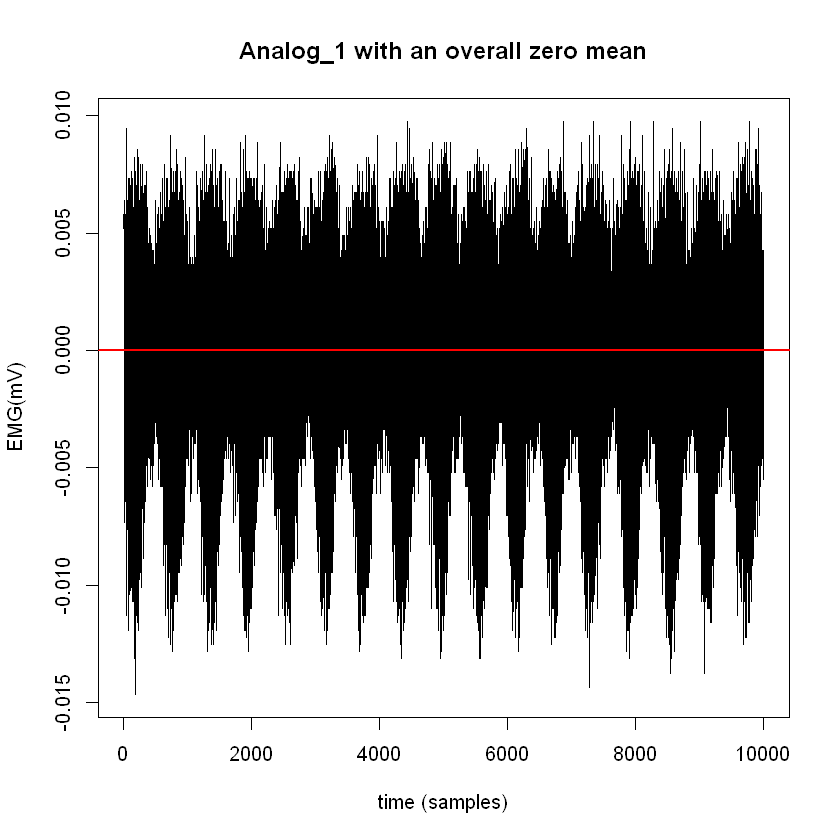

In [6]:
# new variable with DC bias removed
emg2 <- dcbiasremoval(emg1)
# plot
plot(emg2, main="Analog_1 with an overall zero mean")
# plot mean 
abline(h = mean(emg2$values), col = "red", lwd = 2)

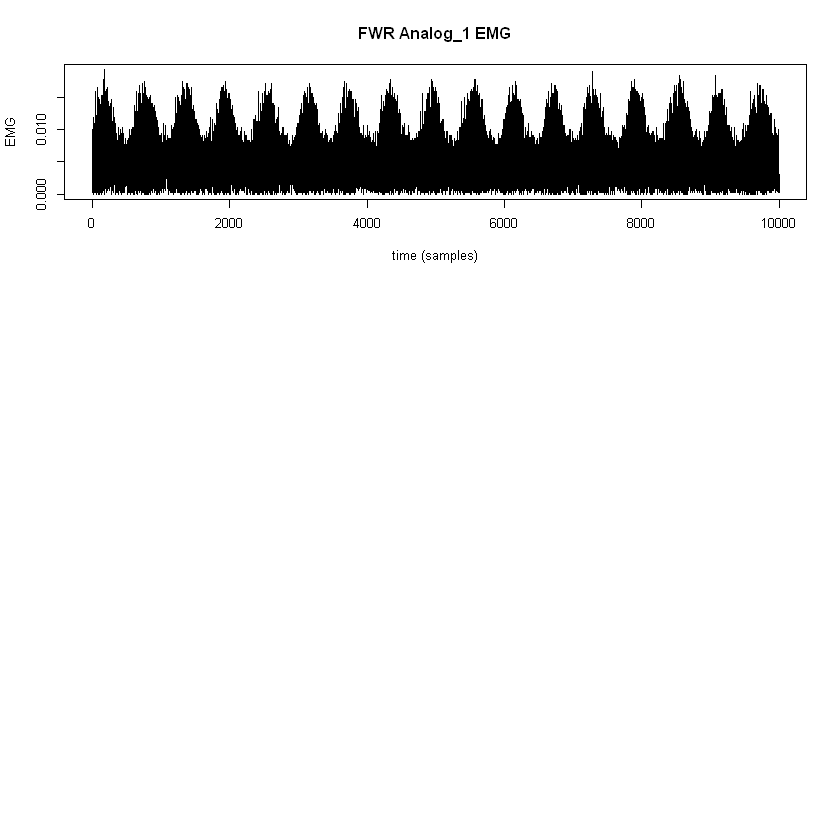

In [7]:
# ensures we can display multiple plots
op <- par(mfrow = c(3, 1))
# Full wave rectification
emgr1 <- rectification(emg(x), rtype="fullwave")
#plot
plot(emgr1, main="FWR Analog_1 EMG")

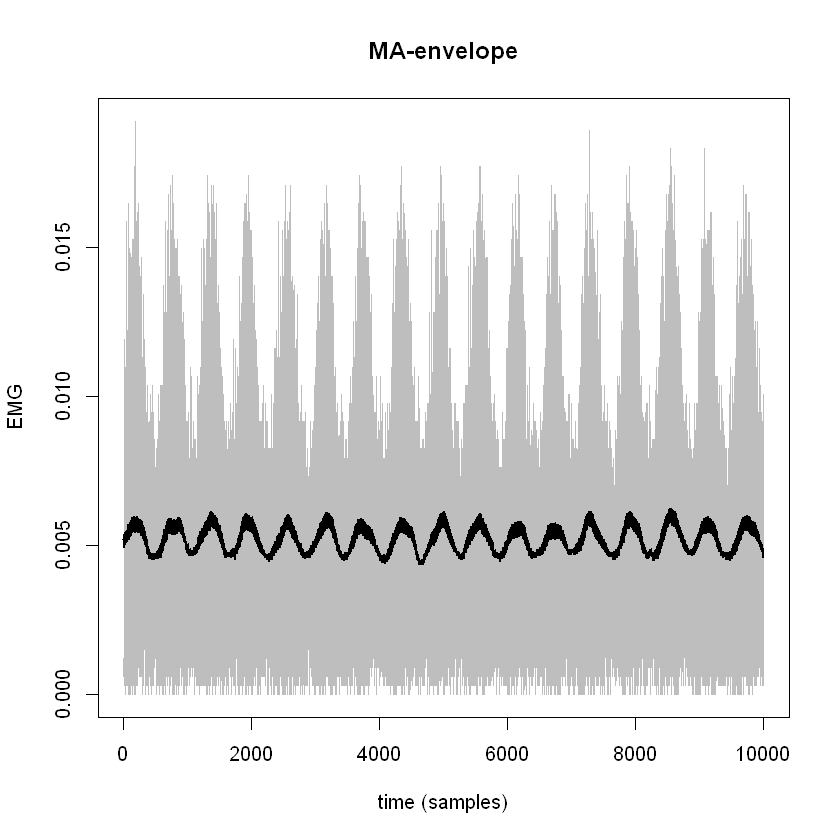

In [8]:
# moving average envelope
emgma <- envelope(emgr1, method="MA", wsize=60)
# plots the EMG in gray
plot(emgr1, main = "MA-envelope", col = "gray")
# plots the linear enveloped EMG
plot(emgma, add = TRUE, lwd = 2)

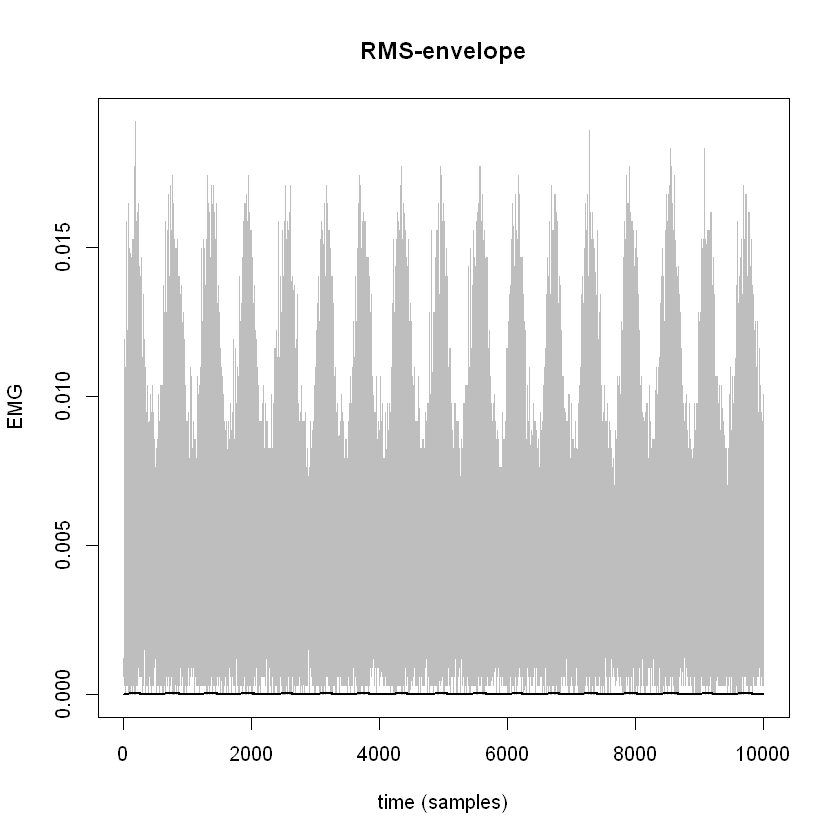

In [9]:
# root mean squared EMG
emgrms <- envelope(emgr1, method = "RMS", wsize = 60)
# plots EMG in gray
plot(emgr1, main = "RMS-envelope", col = "gray")
#plots RMS envelope 
plot(emgrms, add = TRUE, lwd = 2)